In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [5]:
# Charger les données MNIST
mnist = pd.read_csv("mnist_784.csv")

In [10]:
# Diviser les données en ensembles d'apprentissage et de test
X_train, X_test = train_test_split(mnist, test_size=40000, random_state=42)

In [12]:
# Supprimer la colonne "class" de l'ensemble d'apprentissage
X_train = X_train.drop(columns=["class"])

Recherche nombre optimal de classes K : 
1) Indice d'Elbow :
    L'idée est de tracer la somme des carrés des distances intra-cluster en fonction du nombre de clusters (SSE) et d'identifier le point où la courbe présente un coude ou une courbure nette. Ce point est souvent considéré comme le nombre optimal de clusters, car il indique un équilibre entre la compacité intra-cluster (plus faible SSE) et la séparation inter-cluster.

In [93]:
sse = []
for k in range(3,25):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    sse.append(kmeans.inertia_)

In [85]:
# Entraîner le modèle KMeans avec le nombre optimal de clusters
kmeans = KMeans(n_clusters=9, random_state=42)
labels = kmeans.fit_predict(X_train)


array([7, 6, 5, ..., 6, 7, 7])

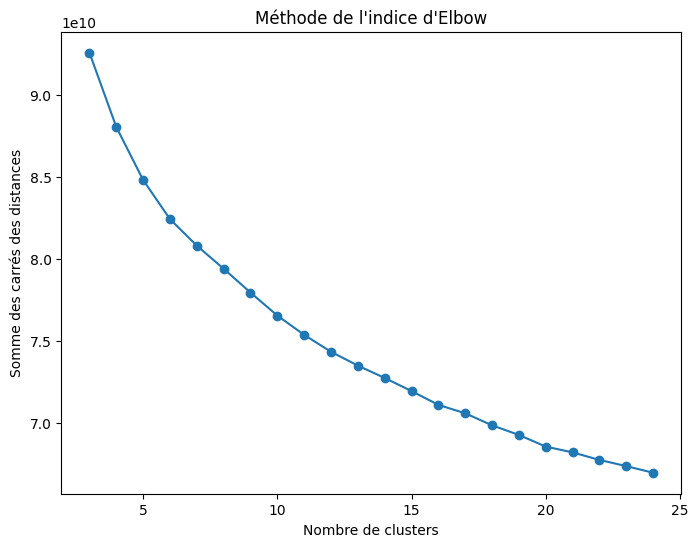

In [95]:

# Tracer la courbe de l'indice d'Elbow
plt.figure(figsize=(8, 6))
plt.plot(range(3,25), sse, marker='o')
plt.title('Méthode de l\'indice d\'Elbow')
plt.xlabel('Nombre de clusters')
plt.ylabel('Somme des carrés des distances')
plt.show()

Interprétation : Le point où le coude se produit indique le point où l'ajout d'un cluster supplémentaire ne réduit pas significativement la somme des carrés des distances intra-cluster. Cela suggère que le nombre de clusters optimale est 11.

In [86]:
# Prédire les étiquettes pour l'ensemble de test
labels_test = kmeans.predict(X_test.drop(columns=["class"]))
labels_test

array([8, 4, 5, ..., 3, 1, 5])

2) Méthode de l'indice de Silhouette :

Le coefficient de silhouette mesure à quel point chaque observation est similaire à son propre cluster par rapport aux autres clusters. 
Il est calculé en soustrayant la distance moyenne aux points du même cluster de la distance moyenne aux points des clusters voisins les plus proches, puis en divisant le résultat par le maximum des deux.
Le coefficient de silhouette global est la moyenne des coefficients de silhouette pour toutes les observations. 
Le nombre optimal de classes K est choisi en maximisant le coefficient de silhouette global, indiquant ainsi une meilleure cohésion intra-cluster et une séparation inter-cluster.


In [87]:
# Nombre de clusters à tester
k_values = range(3,12)

# Calculer l'indice de silhouette pour chaque valeur de K
silhouette_scores = []
for k in k_values:
    kmeans = KMeans(k, random_state=42)
    labels = kmeans.fit_predict(X_train)
    silhouette_avg = silhouette_score(X_train,labels)
    silhouette_scores.append(silhouette_avg)

In [90]:
optimal_k=silhouette_scores.index(max(silhouette_scores))+3
print(optimal_k)

9


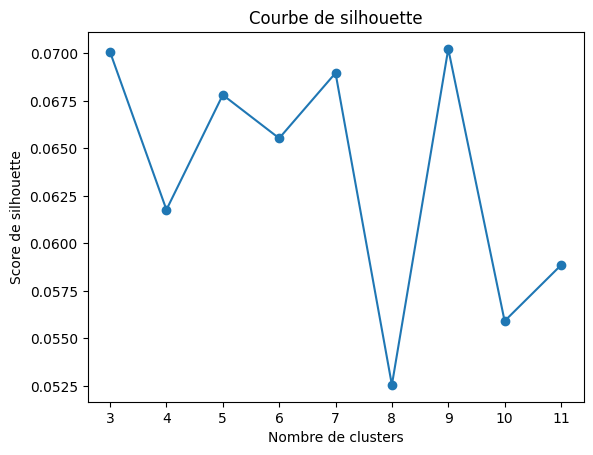

In [89]:
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score de silhouette')
plt.title('Courbe de silhouette')
plt.show()

In [75]:
# Entraîner le modèle KMeans avec le nombre optimal de clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(X_train)

In [76]:
# Prédire les labels pour l'ensemble de test
labels_test = kmeans.predict(X_test.drop(columns=["class"]))

In [77]:
silhouette_train = silhouette_score(X_train, labels)
silhouette_test = silhouette_score(X_test, labels_test)
print("Indice de silhouette pour l'ensemble d'apprentissage :", silhouette_train)
print("Indice de silhouette pour l'ensemble de test :", silhouette_test)

Indice de silhouette pour l'ensemble d'apprentissage : 0.07023915889484343
Indice de silhouette pour l'ensemble de test : 0.07002701630167613


Les valeurs d'indice de silhouette pour l'ensemble d'apprentissage et l'ensemble de test sont assez similaires, ce qui suggère que le modèle KMeans fonctionne de manière cohérente sur les deux ensembles de données .

3) l'analyse hiérarchique ascendante CAH :

La CAH est une méthode de clustering  qui fusionne itérativement des clusters jusqu'à ce qu'il ne reste qu'un seul cluster contenant toutes les observations.
Elle produit un dendrogramme, une représentation visuelle de la manière dont les observations sont regroupées à différents niveaux d'agrégation.
Le nombre optimal de classes  K peut être choisi en observant le dendrogramme et en identifiant les coupures où une séparation claire des clusters est observée.

In [55]:
import pandas as pd
data_echantillon = mnist.sample(500, random_state=42)

In [63]:
from scipy.cluster.hierarchy import linkage, dendrogram
# Calculer la matrice de liaison
Z = linkage(X_train,method='ward',metric='euclidean')
Z

array([[1.86000000e+02, 1.32940000e+04, 2.09549517e+02, 2.00000000e+00],
       [1.84530000e+04, 2.63440000e+04, 2.35997881e+02, 2.00000000e+00],
       [1.70450000e+04, 2.49190000e+04, 2.36031778e+02, 2.00000000e+00],
       ...,
       [5.99920000e+04, 5.99950000e+04, 8.34370286e+04, 2.02590000e+04],
       [5.99930000e+04, 5.99960000e+04, 8.99510161e+04, 2.73610000e+04],
       [5.99840000e+04, 5.99970000e+04, 9.64078323e+04, 3.00000000e+04]])

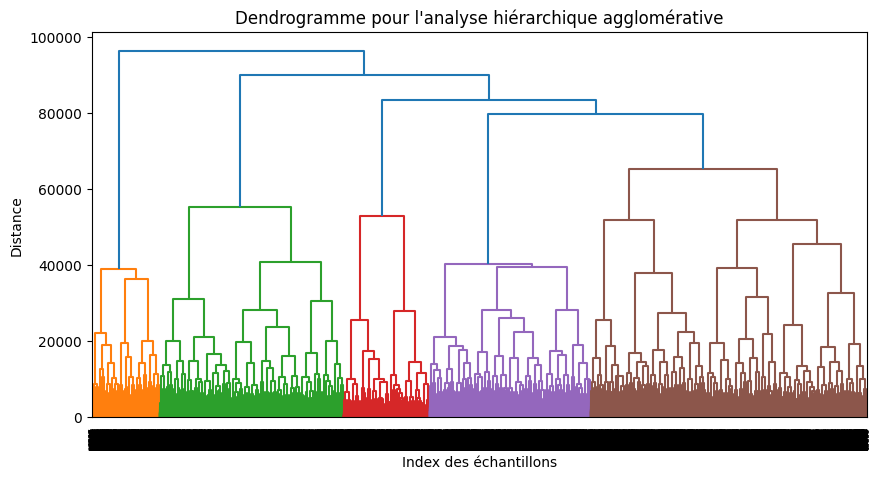

In [64]:
# Tracer le dendrogramme
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title("Dendrogramme pour l'analyse hiérarchique agglomérative")
plt.xlabel("Index des échantillons")
plt.ylabel("Distance")
plt.show()

Le dendrogramme représente visuellement les relations de similarité entre les observations ou les clusters. En traçant une ligne horizontale sur le dendrogramme à une distance spécifique (dans cet exemple, à 40000), nous identifions 12 clusters distincts.